#### KERAS 분류 DNN 모델 구성
- 모델 설계 & 생성 & 학습
- 분류 모델용 손실 함수, 성능지표

- [0] 모듈 로딩 <hr>

In [ ]:
import tensorflow as tf
import keras

print(f'tf version : {tf.__version__}, keras version : {keras.__version__}')

tf version : 2.10.0, keras version : 2.10.0


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import pandas as pd

- [1] 데이터 준비 <hr>

In [ ]:
# 데이터 파일 -------------------------------------------
filename='../data/iris3.csv'

irisDF=pd.read_csv(filename)
irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- [2] 훈련 데이터 준비 <hr>

- [2-1] File => DataFrame 준비

In [ ]:
data=irisDF[irisDF.columns[:-1]]
target=irisDF['species']

In [ ]:
print(f'data => {data.shape}, {data.ndim}차원')
print(f'target => {target.shape}, {target.ndim}차원\n')

print(f'0번행 데이터 ======>\n{data.iloc[0]}\n\n0번행 라벨 ======> {target[0]}')

data => (150, 4), 2차원
target => (150,), 1차원

0번행 데이터 ======>
sepal_length    5.1
sepal_width     3.5
petal_length    1.4
petal_width     0.2
Name: 0, dtype: float64

0번행 라벨 ======> Iris-setosa


- [2-2] 데이터 전처리

In [ ]:
####  타겟 타입 변환  : Object ==> float
target.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 정수 라벨링
encoder = LabelEncoder()
encoder.fit(target)
label_int = encoder.transform(target)
print(f'[정수 라벨링] label_int : {label_int.shape}\n{label_int}')

[정수 라벨링] label_int : (150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
### One-Hot-Encoder
from keras.utils import to_categorical

# 정수형 타겟 >>> 원핫인코딩
target_oh = to_categorical(label_int)
print(f'[인코딩 라벨] target_oh : {target_oh}, {target_oh.shape}\n{type(target_oh)}')

[인코딩 라벨] target_oh : [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1.

#### [3] 모델 설계 <hr>

In [ ]:
# 순차적 모델 인스턴스 생성
irisModel=Sequential(name='irisClassifier')

In [ ]:
# 입력층
irisModel.add(Dense(10, input_shape=(4,), name='In_Layer'))
irisModel.add(Activation('relu'))

# 은닉층
irisModel.add(Dense(8, activation='relu', name='Hidd1'))
irisModel.add(Dense(6, activation='relu', name='Hidd2'))
irisModel.add(Dense(4, activation='relu', name='Hidd3'))

# 출력층
irisModel.add(Dense(3, activation='softmax', name='Out_Layer'))

In [ ]:
irisModel.summary()

Model: "irisClassifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 In_Layer (Dense)            (None, 10)                50        
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
 Hidd1 (Dense)               (None, 8)                 88        
                                                                 
 Hidd2 (Dense)               (None, 6)                 54        
                                                                 
 Hidd3 (Dense)               (None, 4)                 28        
                                                                 
 Out_Layer (Dense)           (None, 3)                 15        
                                                                 
Total params: 235
Trainable params: 235
Non-trainabl

### [4] 모델 생성 <hr>

- 손실함수
    * 회귀용 : mean_squared_error, root_mean_squared_error
    * 이진분류용
        - binary_crossentropy
        - binary_hinge : margin-based loss function, SVM에서 사용되는 hinge loss 유사
    * 다중분류용
        - categorical_crossentropy : 라벨이 One-Hot-Encoding인 경우
        - sparse_categorical_crossentropy : 라벨이 int인 경우
        - categorical_hinge: margin-based loss function, SVM에서 사용되는 hinge loss와 유사
<hr>

- 성능지표
    * 회귀용
        - mse, mae, r2_score
        - mean_squared_error: 모델 예측값과 실제값 제곱 오차 계산
        - mean_absolute_error: 모델 예측값과 실제값 절대 오차 계산
        - mean_absolute_percentage_error: 모델 예측값과 실제값의 오차 비율 계산
        - mean_squared_logarithmic_error: 모델 예측값과 실제값의 로그값 차이 계산
    * 분류용 : 모델의 예측값과 실제값 일치 비율 계산
        - accuracy,
        - binary_accuracy : 이진 분류 문제 평가 지표
        - categorical_accuracy : 다중 클래스 분류 평가 지표
        - sparse_categorical_accuracy: 정수 형태 레이블 사용 다중 클래스 분류 평가 지표
        - top_k_categorical_accuracy: 다중 클래스 분류 평가 지표.
                                      상위 K개 클래스 중 실제 클래스 포함되어 있는 경우 계산
        - sparse_top_k_categorical_accuracy: 정수 형태 레이블 사용 다중 클래스 분류 평가 지표
                                             상위 K개 클래스 중 실제 클래스 포함되어 있는 경우 계산
<hr>

In [ ]:
# 모델을 컴파일
irisModel.compile(  loss='sparse_categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

### [5] 학습 <hr>

### Callback
- 모델 학습 과정 중 호출되는 콜백 함수들 포함하는 모듈
- 모델 학습 도중에 지정된 시점에서 호출되어 추가적인 작업을 수행하거나 모델 조작
- 모델 학습 세밀하게 제어하고, 학습 결과 모니터링하고 저장하는 등 작업 수행
- 자주 사용되는 콜백함수
    * ModelCheckpoint:  지정된 간격으로 모델의 가중치 저장  
                        저장된 가중치 중에서 최상의 결과 보인 모델 선택 가능  
    * EarlyStopping:    모델이 더 이상 개선되지 않을 때 학습 자동 종료   
                        오버피팅 방지 가능  
    * ReduceLROnPlateau:    검증 손실이 개선되지 않을 때 학습률 감소시킴   
                            학습이 더욱 안정적으로 진행될 수 있음  
    * TensorBoard:  모델의 학습 과정을 시각화하기 위한 TensorBoard 로그 생성   
    * CSVLogger:    모델의 학습 과정을 CSV 파일로 기록  
     
    * LearningRateScheduler: 학습률 동적으로 조정

In [ ]:
from keras import callbacks

In [ ]:
# 커스텀 콜백 :  에포크가 끝날 때마다 도트(.) 출력해 훈련 진행 과정 표시
class PrintDot(callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0:  print('')
    print('.', end='')

In [ ]:
### 데이터, 타겟 shape 확인
target_label=label_int.reshape((-1,1))
print(f'data.shape => {data.shape}')
print(f'target_oh.shape => {target_oh.shape}')
print(f'target_label.shape => {target_label.shape}')

data.shape => (150, 4)
target_oh.shape => (150, 3)
target_label.shape => (150, 1)


In [ ]:
### 정수 인코딩 기반 모델 학습 --------------------------------------------------
EPOCHS = 500
PRINT_DOT = PrintDot()

history = irisModel.fit(data, target_label,
                        epochs=EPOCHS,
                        validation_split = 0.2,
                        verbose=0,
                        callbacks=[PRINT_DOT])
print(f'\n학습 종료')


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
학습 종료


#### [5-1] 모델 학습 과정 정보 확인 <hr>

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
495,0.161963,0.975000,0.976326,0.533333,495
496,0.160987,0.983333,0.995635,0.500000,496
497,0.159684,0.983333,1.015001,0.500000,497
498,0.160605,0.966667,1.042017,0.466667,498
499,0.159295,0.975000,0.958084,0.566667,499


In [ ]:
epochs, values = hist['epoch'].values, hist['accuracy'].values

In [ ]:
import matplotlib.pyplot as plt

def plot_history():

    plt.figure(figsize=(10, 12))

    plt.subplot(2, 1, 1)
    plt.xlabel('Epoch')
    plt.ylabel('[ACCURACY]')
    plt.plot(hist['epoch'], hist['accuracy'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='Val Error')
    plt.ylim([0,5])
    plt.title("[CLASSIFICATION ACCURACY]")
    plt.legend()
    plt.show()

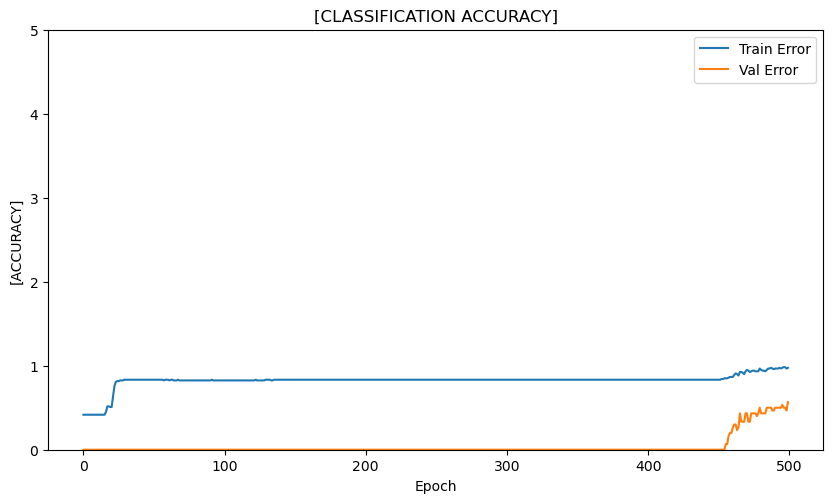

In [ ]:
plot_history()

#### [5-2] 학습 - 조기종료 <hr>

- [조기종료 callback]
- 검증 손실이 더 이상 개선되지 않을 때 학습을 중단시키는 역할
- 과적합 방지하고 학습 시간 단축 가능
- 매개변수
    * monitor: 모니터링할 지표 선택.
        - 일반적으로 'val_loss'나 'val_acc' 선택.
    * min_delta: 개선되었다고 판단할 최소한 변화량.
        - 이 값보다 작으면 개선이 없는 것으로 간주
        - 기본값 0
    * patience: 개선 없다고 판단하기 전에 대기할 에폭 수
        - 이 값만큼 검증 손실 개선되지 않으면 학습 중단.
        - 기본값 0
    * mode: 모니터링할 지표 최소화할지 최대화할지 결정.  
        - 'min': 최소화, 'max' : 최대화
        - 기본값 : 'auto'
        - 'acc', 'accuracy', 'fmeasure', 'precision', 'recall' 중 하나이면 'max'로 설정
        - 그렇지 않으면 'min'으로 설정
    * baseline: 모니터링할 지표의 기준값 설정
        - 이 값보다 개선되지 않으면 학습을 중단
    * restore_best_weights: 최상의 가중치를 복원할지 여부를 결정
        - 이 값을 True로 설정하면 학습 중 최상의 검증 손실을 가진 가중치를 복원
        - 기본값은 False

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping


# patience 매개변수 : 성능 향상 체크할 에포크 횟수
EARLY_STOP = EarlyStopping(monitor='val_loss', patience=10)

- [ModelCheckpoint 콜백]
    - 모델을 학습하는 동안 일정한 간격으로 모델의 가중치 저장
    - 최상의 성능 보인 모델 선택하는 기능 제공
    - 딥러닝 모델 학습의 안정성과 성능 향상을 위해 매우 유용

    - 매개변수들
        * filepath : 문자열. 모델 가중치 저장할 파일 경로  
            - 파일 이름에는 epoch와 val_loss (또는 다른 지표)와 같은 템플릿 인수를 사용할 수 있음
        * monitor : 모니터링할 지표를 지정  
            - 기본값 : val_loss
        * verbose : 얼마나 자세하게 정보를 표시할지를 제어
            - 기본값 : 0,   0, 1 또는 2로 설정 가능
        * save_best_only : 가장 좋은 성능 보인 가중치만 저장하려면 True로 설정, 기본값은 False
        * save_weights_only : 가중치만 저장하려면 True로 설정, 기본값은 False
            - False로 설정하면 모델 구조와 가중치를 모두 저장
        * mode : 모니터링할 지표의 최소화 또는 최대화를 제어
            - 기본값은 'auto', 'auto', 'min' 또는 'max' 중 하나로 설정 가능
        * save_freq : 가중치를 저장할 빈도를 지정
            - 기본값 : 'epoch'
            - 'epoch' 설정 : 각 에포크 끝날 때마다 가중치 저장
            - 정수 설정 : 해당 빈도로 가중치 저장

In [ ]:
filename= './weights.h5'

# ModelCheckpoint 객체 생성
CHECKPOINT = ModelCheckpoint(filename, monitor='val_accuracy', verbose=1,
                             save_best_only=True,
                             mode='max',
                             save_weights_only=True)   # 가중치만 저장


In [ ]:
### 원-핫-인코딩 기반 모델 학습 --------------------------------------------------
EPOCHS = 500

history = irisModel.fit(data, target_label,
                        epochs=EPOCHS,
                        validation_split = 0.2,
                        verbose=0,
                        callbacks=[EARLY_STOP, PRINT_DOT, CHECKPOINT])




.
Epoch 1: val_accuracy improved from -inf to 0.76667, saving model to .\weights.h5
.
Epoch 2: val_accuracy did not improve from 0.76667
.
Epoch 3: val_accuracy did not improve from 0.76667
.
Epoch 4: val_accuracy did not improve from 0.76667
.
Epoch 5: val_accuracy improved from 0.76667 to 0.80000, saving model to .\weights.h5
.
Epoch 6: val_accuracy did not improve from 0.80000
.
Epoch 7: val_accuracy did not improve from 0.80000
.
Epoch 8: val_accuracy did not improve from 0.80000
.
Epoch 9: val_accuracy did not improve from 0.80000
.
Epoch 10: val_accuracy did not improve from 0.80000
.
Epoch 11: val_accuracy did not improve from 0.80000
.
Epoch 12: val_accuracy did not improve from 0.80000
.
Epoch 13: val_accuracy did not improve from 0.80000
.
Epoch 14: val_accuracy did not improve from 0.80000
.
Epoch 15: val_accuracy did not improve from 0.80000
.
Epoch 16: val_accuracy did not improve from 0.80000


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
#plot_history()

,loss,accuracy,val_loss,val_accuracy,epoch
495,0.161963,0.975000,0.976326,0.533333,495
496,0.160987,0.983333,0.995635,0.500000,496
497,0.159684,0.983333,1.015001,0.500000,497
498,0.160605,0.966667,1.042017,0.466667,498
499,0.159295,0.975000,0.958084,0.566667,499


In [ ]:
plot_history()

#### [6] 평가 WITH 테스트 데이터 <hr>

In [ ]:
loss, accuracy = irisModel.evaluate(data, target_label, verbose=1)

print(f"\n테스트 세트의 정확도: {accuracy:5.2f}")

5/5 [==============================] - 0s 12ms/step - loss: 0.1136 - accuracy: 0.9533

테스트 세트의 정확도:  0.95


#### [7] 예측 WITH 사용되지 않은 데이터 <hr>

In [ ]:
## 예측값 출력
pre = irisModel.predict(data)
print(f'pre: {pre}, {pre.shape}')

## 예측값에 대한 라벨
pre_target= np.argmax(pre, axis = 1)

for idx in range(pre.shape[0]):
    print(f'{pre[idx]} - {pre_target[idx]}')


5/5 [==============================] - 0s 2ms/step


pre: [[9.99997675e-01 2.32388220e-06 2.72744556e-16]
 [9.99993265e-01 6.63974697e-06 5.15629189e-15]
 [9.99994934e-01 5.00301212e-06 3.13212243e-15]
 [9.99987543e-01 1.23498867e-05 1.60643830e-14]
 [9.99997675e-01 2.27095052e-06 2.54071741e-16]
 [9.99996245e-01 3.73117655e-06 1.88895534e-16]
 [9.99993265e-01 6.67141921e-06 4.81125514e-15]
 [9.99996364e-01 3.58651391e-06 8.12330960e-16]
 [9.99982893e-01 1.70219882e-05 5.57500315e-14]
 [9.99994814e-01 5.10446125e-06 2.41658923e-15]
 [9.99998510e-01 1.38062694e-06 5.15080934e-17]
 [9.99992788e-01 7.19288437e-06 2.83331420e-15]
 [9.99994576e-01 5.32449849e-06 3.76732345e-15]
 [9.99992669e-01 7.24863457e-06 1.08602482e-14]
 [9.99999464e-01 4.59985813e-07 1.76538479e-18]
 [9.99999344e-01 5.50299944e-07 2.75382447e-18]
 [9.99998629e-01 1.27640385e-06 4.10277845e-17]
 [9.99997199e-01 2.77772210e-06 4.68918128e-16]
 [9.99998033e-01 1.92100401e-06 4.64233778e-17]
 [9.99997914e-01 2.02286355e-06 1.67132359e-16]
 [9.99995410e-01 4.54589690e-06 4.8

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

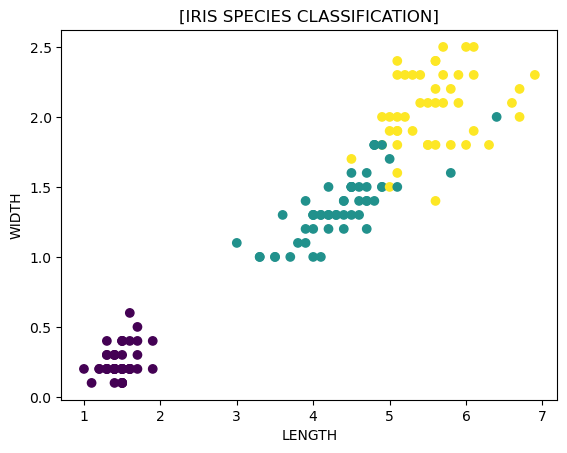

In [ ]:

plt.scatter(data[data.columns[2]], data[data.columns[3]], c=pre_target)
plt.xlabel('LENGTH')
plt.ylabel('WIDTH')
plt.title("[IRIS SPECIES CLASSIFICATION]")
plt.show()